## Import modules

In [1]:
# Import modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Preprocessing

In [2]:
# Prepare the data
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

## Data Exploration

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

## Data Visualization

In [6]:
# show plots in the notebook
%matplotlib inline

## Histogram of Education

Text(0,0.5,'Frequency')

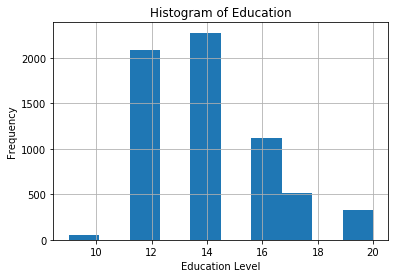

In [7]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

## Histogram or Marriage Rating

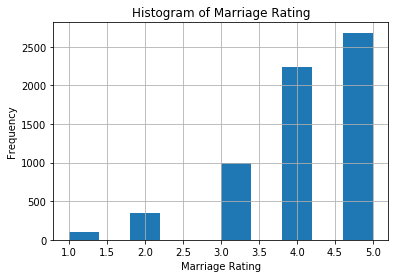

In [10]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

## Marriage Rating vs Children

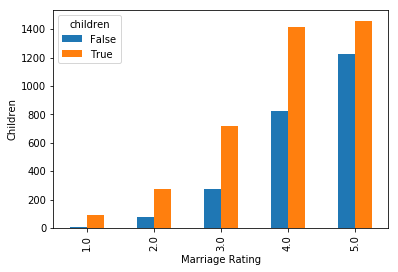

In [11]:
pd.crosstab(dta.rate_marriage,dta.children.astype(bool)).plot(kind='bar')
plt.xlabel('Marriage Rating')
plt.ylabel('Children')
plt.show()

## Preparing for Logistic Regression using statsmodels

## Prepare Logistic Regression with field affair against all the other fields

In [12]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [13]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [14]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [15]:
import statsmodels.discrete.discrete_model as sm

In [16]:
model = sm.Logit(y, X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: y                Pseudo R-squared: 0.137    
Date:               2018-12-16 23:08 AIC:              6946.3465
No. Observations:   6366             BIC:              7061.2449
Df Model:           16               Log-Likelihood:   -3456.2  
Df Residuals:       6349             LL-Null:          -4002.5  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        2.9708   0.5722   5.1917 0.0000  1.8492  4.0923
occ_2            0.3902   0.4476   0.8719 0.3832 -0.4869  1.2674
occ_3            0.7027   0.4415   1.5917 0.1114 -0.1626  1.5679
occ_4        

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y,np.where(result.predict(X)>0.5,1,0))

0.725416273955388

## Try Logisitc Regression of output field affair against fields which have P values less than 0.01

In [18]:
y2, X2 = dmatrices('affair ~ rate_marriage + age + yrs_married +  religious', dta, return_type="dataframe")      
model2 = sm.Logit(y2, X2)
result2 = model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.547236
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: affair           Pseudo R-squared: 0.130    
Date:               2018-12-16 23:09 AIC:              6977.4063
No. Observations:   6366             BIC:              7011.1999
Df Model:           4                Log-Likelihood:   -3483.7  
Df Residuals:       6361             LL-Null:          -4002.5  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        3.7134   0.2609  14.2308 0.0000  3.2020  4.2248
rate_marriage   -0.7103   0.0312 -22.7583 0.0000 -0.7715 -0.6491
age             -0.0602   0.0099  -6.1071 0.0000 -0.0795 -0.0409
yrs_married  

In [19]:
accuracy_score(y,np.where(result.predict(X)>0.5,1,0))

0.725416273955388

In [ ]:
## As the accuracy score is less than original model, we will stick with original model

## Try Logistic Regression by splitting data into training and test data and using scikit learn

In [20]:
# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model3 = LogisticRegression()
model3.fit(X_train, y_train)
predictions_test = model3.predict(X_test)
print("accuracy score test data=" + str(accuracy_score(predictions_test, y_test)))
predictions_train = model3.predict(X_train)
print("accuracy score training data=" + str(accuracy_score(predictions_train, y_train)))

accuracy score test data=0.7298429319371728
accuracy score training data=0.723967684021544
